HW#1 詞頻分析

1. 請先使⽤用分詞工具 斷詞

2. 統計前一百個高頻和TF-IDF權重高的字詞 

3. 計算並畫出其統計圖型 (2個圖)

3.1. 一行算一個文章

3.2. x軸 字詞編號
     y軸 權重 fig#1和 出現頻率 fig#2 

3.3. y軸 要sort過 取前100個

In [1]:
import jieba
import re
from collections import Counter

jieba.set_dictionary('dict.txt.big')  # 加入繁體中文詞庫

word_data = []  # 紀錄每個詞的資料
num_of_words_in_lines = []  # 每一行有幾個詞
line_num = 0  # 行數(文章數)

for line in open('hw1-dataset.txt',encoding='utf-8'):
    line = re.sub("[A-Za-z0-9\：\·\—\，\。\“ \”\.\？\?\(]", "", line)
    seg_list=jieba.lcut(line,cut_all=False) # 斷詞
    c=Counter()  # 某個詞在某行有幾個
    num_of_words = 0  # 某行有幾個詞
    for word in seg_list:
        if word != '\r\n' and word != '\n' and word != '\t' and word != '\u3000':
            c[word] += 1
            num_of_words = num_of_words + 1
    items = []  # 詞
    items = list(c.items())  
    items.sort(key=lambda x:x[1], reverse=True)  # 照詞出現的多寡排序
    word_data += (items, )
    num_of_words_in_lines += (num_of_words, )
    line_num = line_num + 1
#print('詞/在那行出現次數:\n')
#for i in range(line_num):
    #print(word_data[i])

Building prefix dict from /Users/joanna/Desktop/nlp_hw1/dict.txt.big ...
Loading model from cache /var/folders/vf/krhn1yxd4qzc9qr3b221ndq40000gn/T/jieba.ufa192bc550b892ddf524a9bf3a225c1b.cache
Loading model cost 1.069 seconds.
Prefix dict has been built successfully.


In [2]:
import math

TF = 0  # 計算各行各個詞的詞頻
for i in range(line_num):
    for j in range(len(word_data[i])):
        TF = word_data[i][j][1] / num_of_words_in_lines[i]  # 一個詞出現在一個文件的頻率
        word_data[i][j] += (TF, )

in_how_many_line = {}  # 計算各個詞在幾行(幾篇文章)有出現
for i in range(line_num):
    for j in range(len(word_data[i])):
        in_how_many_line[word_data[i][j][0]] = in_how_many_line.get(word_data[i][j][0],0) + 1
        
for i in range(line_num):
    for j in range(len(word_data[i])):
        word_data[i][j] += (in_how_many_line[word_data[i][j][0]], )
        
for i in range(line_num):  # IDF
    for j in range(len(word_data[i])):
        word_data[i][j] += (math.log(line_num/word_data[i][j][3]), )  # 所有文件中含有這個詞之數量的倒數

for i in range(line_num):  # TF-IDF
    for j in range(len(word_data[i])):
        word_data[i][j] += (word_data[i][j][2] * word_data[i][j][4], )

#print('詞/在那行出現次數/TF/在幾篇文章出現/IDF/TF-IDF:\n')
#for i in range(line_num):
    #print(word_data[i])

In [3]:
finaldata = []

for i in range(line_num):
    for j in range(len(word_data[i])):
        finaldata.append((word_data[i][j]))

<font color=black size=5>統計前一百個TF-IDF權重高的字詞並作圖</font>

In [4]:
finaldata.sort(key=lambda x:x[5], reverse=True)  # 依TF-IDF排序

TF_IDF_oh = []  # TF-IDF取前100
already = 0  # 計算已經取出幾個詞了
no = 0  # 要取第幾個finaldata
while(already <= 100):
    repeat_or_not = 0  # 看有無重複
    for j in range(already):
        if already!=0:
            if finaldata[no][0] == TF_IDF_oh[j][0]:  # 欲放入和已放入重複
                no = no+1
                repeat_or_not = 1
                break
    if repeat_or_not == 0:  # 沒重複
        TF_IDF_oh.append(finaldata[no])  # 放入那個詞
        no = no+1
        already = already+1

for i in range(100):
    print(TF_IDF_oh[i])

('戊戌', 1, 1.0, 1, 12.943719848366, 12.943719848366)
('愛玩耍', 1, 1.0, 1, 12.943719848366, 12.943719848366)
('偽鈔', 1, 1.0, 1, 12.943719848366, 12.943719848366)
('角速度', 1, 1.0, 1, 12.943719848366, 12.943719848366)
('何念茲', 1, 1.0, 2, 12.250572667806054, 12.250572667806054)
('柔珠', 1, 1.0, 4, 11.557425487246109, 11.557425487246109)
('岡本', 1, 1.0, 8, 10.864278306686163, 10.864278306686163)
('反田', 9, 0.8181818181818182, 1, 12.943719848366, 10.590316239572182)
('一見鍾情', 1, 1.0, 12, 10.458813198578, 10.458813198578)
('登登', 8, 1.0, 13, 10.378770490904463, 10.378770490904463)
('海闊天空', 1, 1.0, 14, 10.30466251875074, 10.30466251875074)
('巧遇', 1, 1.0, 19, 9.99928086919956, 9.99928086919956)
('紅色警戒', 1, 1.0, 31, 9.509732643880854, 9.509732643880854)
('鞥', 12, 0.8571428571428571, 7, 10.997809699310686, 9.426694027980588)
('は', 1, 1.0, 42, 9.206050230082631, 9.206050230082631)
('蝙蝠', 1, 1.0, 46, 9.115078451876904, 9.115078451876904)
('冰水', 1, 1.0, 48, 9.072518837458109, 9.072518837458109)
('﹎', 14, 0.7, 1

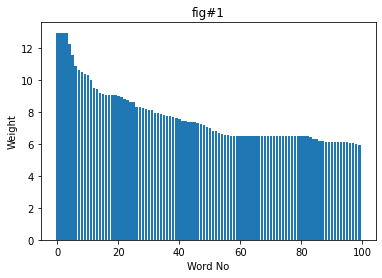

In [5]:
import matplotlib.pyplot as plt  # TF-IDF圖

x_label = []
y_label = []

for i in range(100):
    x_label.append(i)
    y_label.append(TF_IDF_oh[i][5])

plt.title('fig#1')
plt.xlabel('Word No')
plt.ylabel('Weight')
plt.bar(x_label,y_label)

plt.show()

<font color=black size=5>統計前一百個高頻的字詞並作圖</font>

In [6]:
finaldata.sort(key=lambda x:x[2], reverse=True)  # 依TF排序

TF_oh = []  # TF取前100
already = 0
no = 0
while(already<=100):
    repeat_or_not = 0
    for j in range(already):
        if already!=0:
            if finaldata[no][0] == TF_oh[j][0]:
                no = no+1
                repeat_or_not = 1
                break
    if repeat_or_not == 0:
        TF_oh.append(finaldata[no])
        no = no+1
        already = already+1

for i in range(100):
    print(TF_oh[i])

('戊戌', 1, 1.0, 1, 12.943719848366, 12.943719848366)
('愛玩耍', 1, 1.0, 1, 12.943719848366, 12.943719848366)
('偽鈔', 1, 1.0, 1, 12.943719848366, 12.943719848366)
('角速度', 1, 1.0, 1, 12.943719848366, 12.943719848366)
('何念茲', 1, 1.0, 2, 12.250572667806054, 12.250572667806054)
('柔珠', 1, 1.0, 4, 11.557425487246109, 11.557425487246109)
('岡本', 1, 1.0, 8, 10.864278306686163, 10.864278306686163)
('一見鍾情', 1, 1.0, 12, 10.458813198578, 10.458813198578)
('登登', 8, 1.0, 13, 10.378770490904463, 10.378770490904463)
('海闊天空', 1, 1.0, 14, 10.30466251875074, 10.30466251875074)
('巧遇', 1, 1.0, 19, 9.99928086919956, 9.99928086919956)
('紅色警戒', 1, 1.0, 31, 9.509732643880854, 9.509732643880854)
('は', 1, 1.0, 42, 9.206050230082631, 9.206050230082631)
('蝙蝠', 1, 1.0, 46, 9.115078451876904, 9.115078451876904)
('冰水', 1, 1.0, 48, 9.072518837458109, 9.072518837458109)
('嘿嘿', 12, 1.0, 49, 9.051899550255373, 9.051899550255373)
('潮爽', 1, 1.0, 50, 9.031696842937853, 9.031696842937853)
('車手', 1, 1.0, 62, 8.816585463320909, 8.816

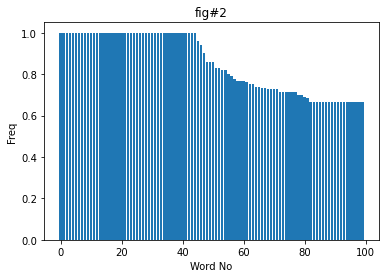

In [7]:
# TF圖
x_label = []
y_label = []

for i in range(100):
    x_label.append(i)
    y_label.append(TF_oh[i][2])

plt.title('fig#2')
plt.xlabel('Word No')
plt.ylabel('Freq')
plt.bar(x_label,y_label)

plt.show()